In [13]:
# imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


### 13.1

Number of events: 72046
First timestamp: 0.0
Last timestamp: 1.0
Maximum x: 239
Minimum x: 4
Maximum y: 179
Minimum y: 1
Positive events: 31037
Negative events: 0


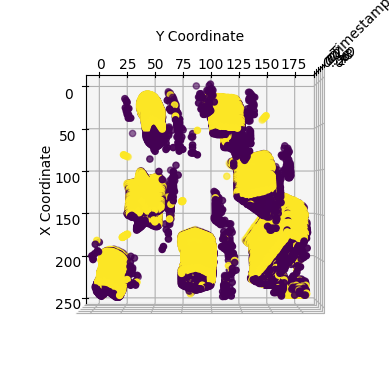

In [14]:
dataset_path = os.getcwd()
images_folder = os.path.join(dataset_path, 'images')
events_file = os.path.join(dataset_path, 'events.txt')

with open(events_file, 'r') as f:
    events_data = f.readlines()

events = []
for line in events_data:
    event = line.split()
    events.append(event)

    timestamp = float(event[0])
    if timestamp >= 1:
        break

timestamps = [float(event[0]) for event in events]
x = [int(event[1]) for event in events]
y = [int(event[2]) for event in events]
polarities = [int(event[3]) for event in events]

num_events = len(events)
first_timestamp = timestamps[0]
last_timestamp = timestamps[-1]
max_x_coordinate = max(x)
min_x_coordinate = min(x)
max_y_coordinate = max(y)
min_y_coordinate = min(y)
num_positive_polarity = sum(1 for polarity in polarities if polarity > 0)
num_negative_polarity = sum(1 for polarity in polarities if polarity < 0)

print("Number of events:", num_events)
print("First timestamp:", first_timestamp)
print("Last timestamp:", last_timestamp)
print("Maximum x:", max_x_coordinate)
print("Minimum x:", min_x_coordinate)
print("Maximum y:", max_y_coordinate)
print("Minimum y:", min_y_coordinate)
print("Positive events:", num_positive_polarity)
print("Negative events:", num_negative_polarity)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, timestamps, c=polarities)
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Timestamp')
ax.view_init(90, 0)
plt.show()

### 13.2

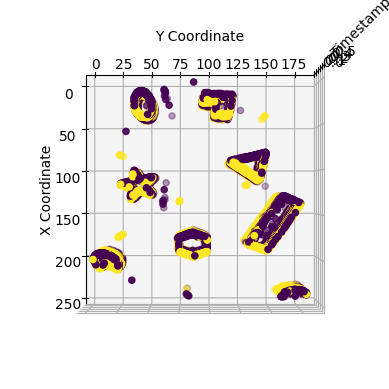

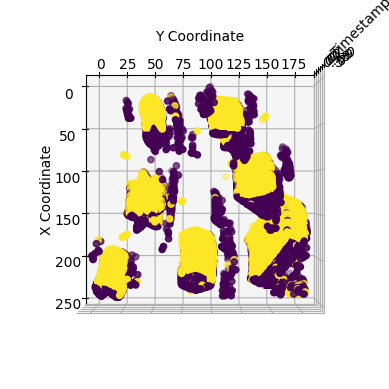

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:8000], y[:8000], timestamps[:8000], c=polarities[:8000])
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Timestamp')
ax.view_init(90, 0)
plt.show()

filtered_indices = [i for i, timestamp in enumerate(timestamps) if 0.5 <= timestamp <= 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[i] for i in filtered_indices], [y[i] for i in filtered_indices], [timestamps[i] for i in filtered_indices], c=[polarities[i] for i in filtered_indices])
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Timestamp')
ax.view_init(90, 0)
plt.show()

### 13.3

In [16]:
events = []
for line in events_data:
    event = line.split()
    events.append(event)

    timestamp = float(event[0])
    if timestamp <= 1:
        continue
    elif timestamp >= 2:
        break

timestamps = [float(event[0]) for event in events]
x = [int(event[1]) for event in events]
y = [int(event[2]) for event in events]
polarities = [int(event[3]) for event in events]

def event_frame(x, y, polarities, image_shape):
    event_image = (np.ones(image_shape) * 127).astype(np.uint8)
    
    for x, y, polarity in zip(x, y, polarities):
        if polarity == 1:
            event_image[y, x] = 255
        else:
            event_image[y, x] = 0
    
    return event_image


tau = 0.01 #

temp_timestamps = []
temp_x = []
temp_y = []
temp_polarities = []

for i in range(len(timestamps)):
    temp_timestamps.append(timestamps[i])
    temp_x.append(x[i])
    temp_y.append(y[i])
    temp_polarities.append(polarities[i])
    
    if temp_timestamps[-1] - temp_timestamps[0] > tau:
        event_image = event_frame(temp_x, temp_y, temp_polarities, (180, 240))
        cv2.imshow('Event Frame', event_image)
        cv2.waitKey(0)
        
        temp_timestamps = []
        temp_x = []
        temp_y = []
        temp_polarities = []

cv2.destroyAllWindows()